In [8]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install matplotlib
%matplotlib inline

In [14]:
dataset_train=pd.read_csv(r"C:\Users\Dell\Desktop\Internships\WiDs\Google_test_data.csv")
dataset_train
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600


In [18]:
training_set= dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)


[[1236.97998 ]
 [1235.189941]
 [1229.26001 ]
 [1224.72998 ]
 [1202.030029]
 [1205.02002 ]
 [1208.      ]
 [1200.      ]
 [1207.140015]
 [1208.819946]
 [1227.599976]
 [1241.290039]
 [1237.449951]
 [1244.22998 ]
 [1234.97998 ]
 [1204.27002 ]
 [1193.800049]
 [1186.300049]
 [1158.670044]
 [1172.189941]
 [1161.630005]
 [1172.719971]
 [1170.73999 ]
 [1179.099976]
 [1170.140015]
 [1157.089966]
 [1164.97998 ]
 [1179.98999 ]
 [1192.      ]
 [1157.170044]
 [1176.150024]
 [1185.150024]
 [1186.72998 ]
 [1191.869995]
 [1199.890015]
 [1190.959961]
 [1205.      ]
 [1195.329956]
 [1167.5     ]
 [1150.109985]
 [1146.150024]
 [1131.079956]
 [1072.939941]
 [1108.      ]
 [1108.910034]
 [1104.589966]
 [1126.459961]
 [1121.839966]
 [1093.369995]
 [1103.060059]
 [1080.890015]
 [1104.25    ]
 [1071.790039]
 [1037.030029]
 [1082.469971]
 [1008.460022]
 [1059.810059]
 [1075.800049]
 [1073.72998 ]
 [1055.      ]
 [1039.47998 ]
 [1069.      ]
 [1091.380005]
 [1073.98999 ]
 [1061.390015]
 [1043.290039]
 [1050.   

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range =(0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.87664104],
       [0.87067623],
       [0.85091638],
       [0.83582131],
       [0.76018002],
       [0.77014333],
       [0.78007329],
       [0.75341551],
       [0.77720763],
       [0.78280553],
       [0.84538478],
       [0.89100312],
       [0.87820709],
       [0.90079966],
       [0.8699766 ],
       [0.76764417],
       [0.73275589],
       [0.70776422],
       [0.61569488],
       [0.66074619],
       [0.62555813],
       [0.66251237],
       [0.65591463],
       [0.68377197],
       [0.65391538],
       [0.61042971],
       [0.636721  ],
       [0.6867377 ],
       [0.72675773],
       [0.61069655],
       [0.67394207],
       [0.70393208],
       [0.70919684],
       [0.72632452],
       [0.75304901],
       [0.72329208],
       [0.77007662],
       [0.73785388],
       [0.64511827],
       [0.58717086],
       [0.57397539],
       [0.52375856],
       [0.33002308],
       [0.44685101],
       [0.44988344],
       [0.43548801],
       [0.50836371],
       [0.492

In [22]:
X_train = []
y_train = []
for i in range(60,252):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [23]:
print(X_train.shape)
print(y_train.shape)


(192, 60)
(192,)


In [24]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(192, 60, 1)

In [32]:
!pip install keras
get_ipython().system('pip install keras')
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1) ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [ ]:
regressor.compile(optimizer = 'adam',  loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100,batch_size=32)

In [33]:
dataset_test = pd.read_csv(r"C:\Users\Dell\Desktop\Internships\WiDs\Google_test_data.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [36]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range (60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Dell\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host


NameError: name 'predicted_stock_price' is not defined

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Dell\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Dell\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by th

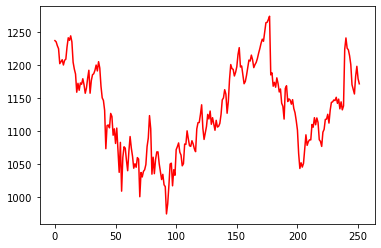

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Dell\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Dell\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by th

In [41]:
plt.plot(actual_stock_price, color = 'red', label= 'Actual Google Stock Price')
plt.plot(predicted_stock_price,color='blue', label='Predicted  Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()